In [1]:
import pandas as pd
import numpy as np
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import keras
import keras.models
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Cropping2D
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
model = keras.models.load_model('model.h5')

In [3]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_1 (Cropping2D)        (None, 66, 200, 3)    0           cropping2d_input_1[0][0]         
____________________________________________________________________________________________________
lambda_1 (Lambda)                (None, 66, 200, 3)    0           cropping2d_1[0][0]               
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 31, 98, 24)    1824        lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 14, 47, 36)    21636       convolution2d_1[0][0]            
___________________________________________________________________________________________

In [4]:
print(keras.__version__)

1.2.1


In [5]:
import pydot
from keras.utils.visualize_util import plot
plot(model, to_file='examples/model.png', show_shapes=True, show_layer_names=False)

Predicted -0.18939685821533203


/Users/muhammaddawood/anaconda/envs/carnd-term1/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


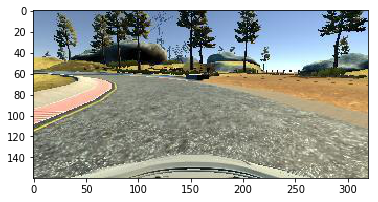

In [9]:
from vis.utils import utils
img = utils.load_img('lake/2017_12_17_21_23_26_298.jpg', target_size=(160, 320))
plt.imshow(img)
pred = model.predict(np.expand_dims(img, axis=0))[0][0]
print('Predicted {}'.format(pred))

In [10]:
from vis.visualization import visualize_saliency, overlay

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = -1
titles = ['right steering', 'left steering', 'maintain steering']
modifiers = [None, 'negate', 'small_values']


from vis.visualization import visualize_cam

for i, modifier in enumerate(modifiers):
    heatmap = visualize_cam(model, layer_idx=-1, filter_indices=0, 
                            seed_input=bgr_img, grad_modifier=modifier)
    plt.figure()
    plt.title(titles[i])
    # Overlay is used to alpha blend heatmap onto img.
    plt.imshow(overlay(img, heatmap, alpha=0.7))

ImportError: cannot import name '_Conv'